Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Shanoverali Saiyed"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

## Checking out the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## Question 1: Categorize Cereals

In [4]:
# Declaring a list of categories in context

preCats = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice','Other']

In [5]:
# defining the function to apply on the columns

def getTypeFromName(name):
    lowerName = name.lower()
    for cat in preCats:
        if cat in name:
            return cat
        
    return 'Other'

In [6]:
# applying the function on the dataframe

df['Type of Cereal'] = df['name'].apply(getTypeFromName)
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran


## Answer 1

In [7]:
df['Type of Cereal'].value_counts()

Type of Cereal
Other     37
Bran      13
Wheat     11
Nut        5
Crunch     4
Corn       4
Rice       3
Name: count, dtype: int64

______________________________________________________________________________________________

## Question 2: Negative Values

In [8]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Wheat
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559,Wheat


In [9]:
# Getting all columns with numerical values:
numerical_columns = df.select_dtypes(include=[float, int])

# Display the numerical columns
print('Numerical columns:',numerical_columns.columns)

Numerical columns: Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')


In [10]:
# let's first create a mapping function that contains median values of all the numerical columns

mapper = []

for col in numerical_columns:
    mapper.append({'col':col, 'median': df[col].median()})
    
mapper

[{'col': 'calories', 'median': 110.0},
 {'col': 'protein', 'median': 3.0},
 {'col': 'fat', 'median': 1.0},
 {'col': 'sodium', 'median': 180.0},
 {'col': 'fiber', 'median': 2.0},
 {'col': 'carbo', 'median': 14.0},
 {'col': 'sugars', 'median': 7.0},
 {'col': 'potass', 'median': 90.0},
 {'col': 'vitamins', 'median': 25.0},
 {'col': 'shelf', 'median': 2.0},
 {'col': 'weight', 'median': 1.0},
 {'col': 'cups', 'median': 0.75},
 {'col': 'rating', 'median': 40.400208}]

In [11]:
# method checking how many negative values

def checkNegatives():
    total = 0
    for col in numerical_columns:
        negCounts = (df[col] < 0).sum()
        total+= negCounts
        print(col,' has ', negCounts, ' negative values')
    return total

print('\nTotal Negative before replacing:',checkNegatives())

calories  has  0  negative values
protein  has  0  negative values
fat  has  0  negative values
sodium  has  0  negative values
fiber  has  0  negative values
carbo  has  1  negative values
sugars  has  1  negative values
potass  has  2  negative values
vitamins  has  0  negative values
shelf  has  0  negative values
weight  has  0  negative values
cups  has  0  negative values
rating  has  0  negative values

Total Negative before replacing: 4


In [12]:
# method to get median value based on column-name
def getMedianOfColumn(column_name):
    for item in mapper:
        if item['col'] == column_name :
            value = item['median']
            break

    return value

In [13]:
# actually apply methods on dataframe

for col in numerical_columns:
    df[col] = df[col].apply(lambda x: getMedianOfColumn(col) if x < 0 else x)

In [14]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,90.0,25,3,1.0,0.75,34.384843,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,Wheat


## Answer 2

In [15]:
# Now check for negative values again!
print('\nTotal Negative after replacing:',checkNegatives())

calories  has  0  negative values
protein  has  0  negative values
fat  has  0  negative values
sodium  has  0  negative values
fiber  has  0  negative values
carbo  has  0  negative values
sugars  has  0  negative values
potass  has  0  negative values
vitamins  has  0  negative values
shelf  has  0  negative values
weight  has  0  negative values
cups  has  0  negative values
rating  has  0  negative values

Total Negative after replacing: 0


______________________________________________________________________________________________

## Question 3: Standardizing 'weight'

In [16]:
# segregating the columns with nutritious values

nutri_cols = numerical_columns[['weight','calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
nutri_cols['weight'].value_counts()

weight
1.00    64
1.33     5
1.25     2
1.50     2
0.50     2
1.30     1
0.83     1
Name: count, dtype: int64

In [17]:
# checking for cases with 'weight' not a standardized value:

def getNonStandardStats():
    non_standard = nutri_cols[nutri_cols['weight'] != 1]
    standard = nutri_cols[nutri_cols['weight'] == 1]

    print('Non-standard instances:', len(non_standard))
    print('Standard instances:', len(standard))
    
getNonStandardStats()

Non-standard instances: 13
Standard instances: 64


In [18]:
# putting a describe method before doing the standardizing to check if the values got updated standardization

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [19]:
# standardize such values


for index, row in df.iterrows():
    weight = row['weight']
    
    if weight!=1:
        for col in nutri_cols.columns:
            if col!='weight':
                df[col].iloc[index] = row[col]/weight # changing the column value new updated value
                df['weight'].iloc[index] = 1 # changing the 'weight' to standard value '1'

C:\Users\Shanover\AppData\Local\Temp\ipykernel_21864\3572135466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[index] = row[col]/weight # changing the column value new updated value
C:\Users\Shanover\AppData\Local\Temp\ipykernel_21864\3572135466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'].iloc[index] = 1 # changing the 'weight' to standard value '1'
C:\Users\Shanover\AppData\Local\Temp\ipykernel_21864\3572135466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

## Answer 3

In [20]:
# check for non-standard values now:

non_standard = df[df['weight'] != 1]
standard = df[df['weight'] == 1]

print('Non-standard instances :', len(non_standard))
print('standard instances :', len(standard))

Non-standard instances : 0
standard instances : 77


In [21]:
df.describe()

# values updated - check the mean is changed for other nutrition values after we update the value to standardize weight.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000
mean,103.996910,2.490851,0.967279,153.356701,2.052066,14.617424,6.659386,93.769663,26.873265,2.207792,1.0,0.821039,42.665705
std,13.851864,1.084322,0.983707,82.768011,2.302014,4.202522,4.066710,62.799052,20.511148,0.832524,0.0,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,20.000000,0.000000,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,125.000000,1.000000,11.500000,3.000000,45.000000,25.000000,1.000000,1.0,0.670000,33.174094
50%,106.666667,2.255639,1.000000,157.894737,1.538462,14.000000,6.015038,90.000000,25.000000,2.000000,1.0,0.750000,40.400208
75%,110.000000,3.000000,1.333333,200.000000,3.000000,17.000000,10.000000,114.457831,25.000000,3.000000,1.0,1.000000,50.828392
max,150.000000,6.000000,5.000000,320.000000,14.000000,26.000000,15.000000,330.000000,100.000000,3.000000,1.0,1.500000,93.704912


______________________________________________________________________________________________

## Question 4: Healthy/Unhealthy

In [22]:
df['vitamins'].unique() # try with other columns

array([ 25.        ,   0.        ,  18.79699248,  20.        ,
       100.        ,  76.92307692,  16.66666667,  66.66666667])

In [23]:
# let's define criteria for healthy unhealthy
maxHealthyVals = {'calories':300, 'fat': 1, 'sodium':200} # negative factors, hence a maximum threshold
minHealthyVals = {'vitamins':20,'protein':0.3} # positive factors, hence a minimum threshold

In [24]:
# a method that we will use on a df

def applyMethodToGetHealth(row):
    healthy = 1 # set a default healthy food
    row_dict = row.to_dict() # convert Pandas.Series() to a Dictionary so that we can index with columns
    
    for col, max_val in maxHealthyVals.items():
        if row_dict[col] > max_val: # if value is greater than max, it is unhealthy
            healthy = 0
            
    if healthy == 1:
        for col, min_val in minHealthyVals.items():
            if row_dict[col] <= min_val:  # if value is less than min, it is unhealthy
                healthy = 0
            
    return 'healthy' if healthy==1 else 'unhealthy'

In [25]:
df['health_stat'] = df.apply(applyMethodToGetHealth, axis=1)

## Answer 4

In [26]:
df['health_stat'].value_counts()

health_stat
unhealthy    44
healthy      33
Name: count, dtype: int64

______________________________________________________________________________________________

## Question 5: what % of manufacturer are healthy

In [27]:
# define a new DF that has only the Manufacturer column and Health Status

df_mfr = df[['mfr','health_stat']]

## Answer 5

In [28]:
# Calculate the total count per manufacturer
manufacturer_counts = df_mfr.groupby('mfr').size()

# Calculate the count of healthy and unhealthy per manufacturer
health_counts = df_mfr.groupby(['mfr', 'health_stat']).size().unstack()

# Calculate the percentage of healthy and unhealthy per manufacturer
health_percentage = health_counts.div(manufacturer_counts, axis=0) * 100

# Fill missing values with 0 (if a manufacturer doesn't have a specific health status)
health_percentage = health_percentage.fillna(0)

# Print the result
print(health_percentage)

health_stat     healthy  unhealthy
mfr                               
A            100.000000   0.000000
G             45.454545  54.545455
K             52.173913  47.826087
N             33.333333  66.666667
P             55.555556  44.444444
Q             12.500000  87.500000
R             25.000000  75.000000


______________________________________________________________________________________________

## Question 6: Average, Max, Min of Healthy/Unhealthy

In [29]:
df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,health_stat
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,unhealthy


## Answer 6

In [30]:
unhealthyRows = df[df['health_stat']=='unhealthy']

print('Ratings Stats of Unhealthy Food:')
print('Average:', unhealthyRows['rating'].describe()['mean'])
print('Max:', unhealthyRows['rating'].describe()['max'])
print('Min:', unhealthyRows['rating'].describe()['min'])

Ratings Stats of Unhealthy Food:
Average: 42.97194970454546
Max: 74.472949
Min: 18.042851


In [31]:
healthyRows = df[df['health_stat']=='healthy']

print('Ratings Stats of Healthy Food:')
print('Average:', healthyRows['rating'].describe()['mean'])
print('Max:', healthyRows['rating'].describe()['max'])
print('Min:', healthyRows['rating'].describe()['min'])

Ratings Stats of Healthy Food:
Average: 42.257378696969695
Max: 93.704912
Min: 22.396513


______________________________________________________________________________________________

## Question 7: Rating stats on each category of cereal

In [32]:
# a method to get the required stat

def getStatsForCat(cat):
    section = df[df['Type of Cereal']==cat]
    return {'category':cat, 'average': section['rating'].describe()['mean'], 'min':  section['rating'].describe()['max'], 'max':section['rating'].describe()['min']}

## Answer 7

In [33]:
# Looping through all the categories and saving the stats, and converting into a representable dataframe

statRow = []

for cat in preCats:
    statRow.append(getStatsForCat(cat))
    
statRowDf = pd.DataFrame(statRow, columns = ['category', 'average', 'min','max'])
statRowDf

,category,average,min,max
0,Bran,50.714179,93.704912,28.592785
1,Wheat,56.333863,72.801787,36.176196
2,Fiber,NaN,NaN,NaN
3,Protein,NaN,NaN,NaN
4,Crunch,26.078598,36.523683,18.042851
5,Corn,40.482720,45.863324,35.782791
6,Nut,42.736791,53.371007,31.072217
7,Rice,47.771735,60.756112,40.560159
8,Other,37.379947,55.333142,21.871292


______________________________________________________________________________________________

## Question 8: Stacked Chart

Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

In [34]:
# first let's group by

df.groupby(['mfr','Type of Cereal']).agg({'Type of Cereal':'count'})

Type of Cereal
mfr Type of Cereal                
A   Other                        1
G   Bran                         2
    Corn                         1
    Crunch                       1
    Nut                          1
    Other                       14
    Wheat                        3
K   Bran                         5
    Corn                         2
    Crunch                       2
    Nut                          2
    Other                        9
    Rice                         1
    Wheat                        2
N   Bran                         2
    Wheat                        4
P   Bran                         2
    Nut                          2
    Other                        5
Q   Bran                         1
    Crunch                       1
    Other                        4
    Rice                         1
    Wheat                        1
R   Bran                         1
    Corn                         1
    Other                        4
    Rice                         1
    Wheat                        1

In [35]:
# let's unstack on Type of Cereal to make it plottable

plottableDf = df.groupby(['mfr','Type of Cereal']).agg({'Type of Cereal':'count'}).unstack('Type of Cereal')
plottableDf

Type of Cereal                                  
Type of Cereal           Bran Corn Crunch  Nut Other Rice Wheat
mfr                                                            
A                         NaN  NaN    NaN  NaN   1.0  NaN   NaN
G                         2.0  1.0    1.0  1.0  14.0  NaN   3.0
K                         5.0  2.0    2.0  2.0   9.0  1.0   2.0
N                         2.0  NaN    NaN  NaN   NaN  NaN   4.0
P                         2.0  NaN    NaN  2.0   5.0  NaN   NaN
Q                         1.0  NaN    1.0  NaN   4.0  1.0   1.0
R                         1.0  1.0    NaN  NaN   4.0  1.0   1.0

In [36]:
# replace NaN with 0
plottableDf.fillna(0, inplace=True) # inplace true
plottableDf

Type of Cereal                                  
Type of Cereal           Bran Corn Crunch  Nut Other Rice Wheat
mfr                                                            
A                         0.0  0.0    0.0  0.0   1.0  0.0   0.0
G                         2.0  1.0    1.0  1.0  14.0  0.0   3.0
K                         5.0  2.0    2.0  2.0   9.0  1.0   2.0
N                         2.0  0.0    0.0  0.0   0.0  0.0   4.0
P                         2.0  0.0    0.0  2.0   5.0  0.0   0.0
Q                         1.0  0.0    1.0  0.0   4.0  1.0   1.0
R                         1.0  1.0    0.0  0.0   4.0  1.0   1.0

## Answer 8

<AxesSubplot: title={'center': 'Type of Cereal of each Manufacturer'}, xlabel='mfr'>

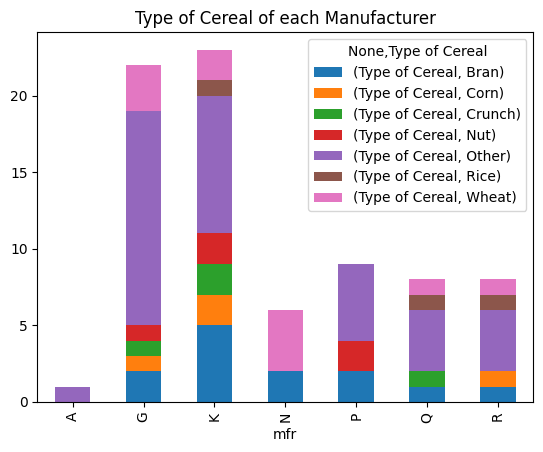

In [37]:
# plot directly on DF

plottableDf.plot(kind = "bar", stacked = True, title='Type of Cereal of each Manufacturer')

_________________________________________________________________________

## Question 9

Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

In [43]:
# slice the required information

scatplotDf = df[['rating','calories','health_stat']]
scatplotDf

,rating,calories,health_stat
0,68.402973,70.0,healthy
1,33.983679,120.0,unhealthy
2,59.425505,70.0,unhealthy
3,93.704912,50.0,healthy
4,34.384843,110.0,unhealthy
...,...,...,...
72,39.106174,110.0,unhealthy
73,27.753301,110.0,healthy
74,49.787445,100.0,unhealthy
75,51.592193,100.0,healthy


In [45]:
# Using seaborn library for plotting

import seaborn as sns

# replacing the healthy with 1, and unhealthy with 0 to be able to process in the next step (Categorical to Numerical)
scatplotDf['health_stat'].replace({'healthy':1, 'unhealthy':0}, inplace=True)
scatplotDf

C:\Users\Shanover\AppData\Local\Temp\ipykernel_21864\1861614966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatplotDf['health_stat'].replace({'healthy':1, 'unhealthy':0}, inplace=True)


,rating,calories,health_stat
0,68.402973,70.0,1
1,33.983679,120.0,0
2,59.425505,70.0,0
3,93.704912,50.0,1
4,34.384843,110.0,0
...,...,...,...
72,39.106174,110.0,0
73,27.753301,110.0,1
74,49.787445,100.0,0
75,51.592193,100.0,1


## Answer 9:

<AxesSubplot: xlabel='rating', ylabel='calories'>

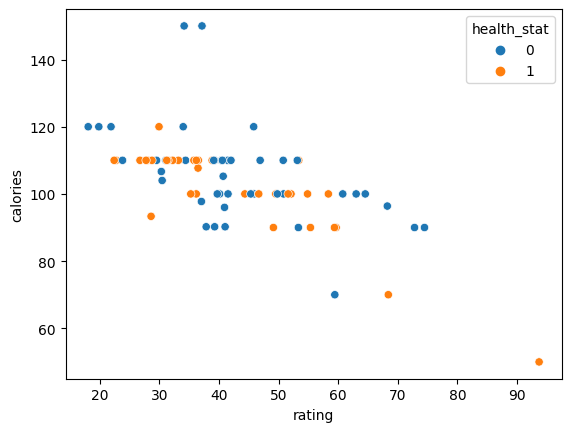

In [40]:
# plot the 3D scatter plot (3rd dimension is the health_stat representing with color)

sns.scatterplot(x = 'rating', y = 'calories', data = scatplotDf, hue = 'health_stat') # hue (color) using the 3rd dimension

__________________________________________________________________________________

## Question 10: Which shelf has the most healthy cereals?

In [41]:
# slice only the required information

copyDf = df[['shelf', 'health_stat']]
copyDf = copyDf[copyDf['health_stat']=='healthy'] # take only healthy
copyDf.shape

(33, 2)

In [42]:
# group by the shelf and aggregate function of 'count', so that we know total counts

groupShelf = copyDf.groupby(['shelf']).agg({'health_stat':'count'})
groupShelf

,health_stat
shelf,
1,6
2,13
3,14


## Answer 10: Shelf 3 has maximum healthy food as per criteria in this notebook

________________________________________________________________________

## Question 11: 

Based on the analysis conducted, what can you conclude about the cereal data set?

## Answer 11:

The given dataset was interesting and initially I was not expecting that this much information can squeezed out of it. The way we plotted the Stacked bar plot gave me the information that most of the manufacturers uses barn or wheat more than other cereals. Moreover, the third shelf is the most healthy as per the set criteria. 
Using the 3D scatter plot we see there is not direct relationship/correlation among the entities (at least for the health criteria set in this notebook). Overall it was a good practice dataset and helped to learn and grasp concepts even better.

___________ end of this notebook _________________________